<a href="https://colab.research.google.com/github/anikaemo/Artificial_Intelligence_Lab/blob/main/CardioVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!pip install --upgrade pip

In [124]:
!pip install imbalanced-learn

In [125]:
pip install tensorflow

In [126]:
pip install scikeras

In [127]:
pip install xgboost

In [128]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [129]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
df = pd.read_csv('/content/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [131]:
df = df.drop(['id'], axis=1)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [132]:
df.tail(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


EDA

In [133]:
print(df.dtypes.value_counts())

int64      11
float64     1
Name: count, dtype: int64


In [134]:
df.duplicated().sum()

np.int64(24)

EDA_END

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [137]:
df.value_counts('cardio')

,count
cardio,
0,35021
1,34979


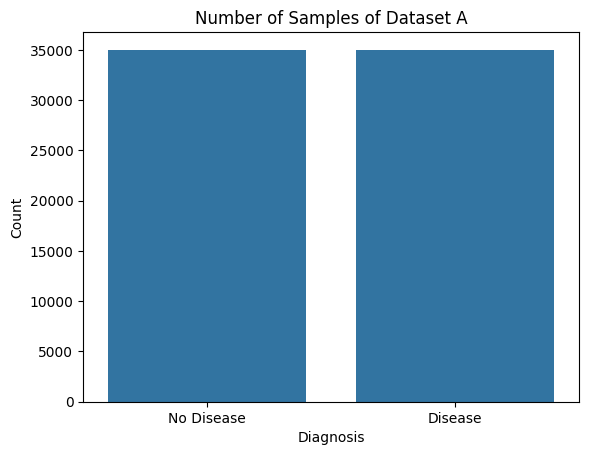

In [138]:
sns.countplot(x='cardio', data=df)
plt.title('Number of Samples of Dataset A')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.savefig('Number_of_samples_Dataset_A.pdf', bbox_inches='tight')
plt.show()

In [139]:
x = df.drop(columns=['cardio'])


In [140]:
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [142]:
df_encoded = pd.get_dummies(df,columns=['age', 'gender', 'height', 'weight','ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco', 'active', 'cardio'],drop_first=True
)

In [143]:
# Convert 'bool' columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())
print(df.dtypes)

     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [144]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [145]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [146]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 12


In [147]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [148]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

age
Skew : -0.31


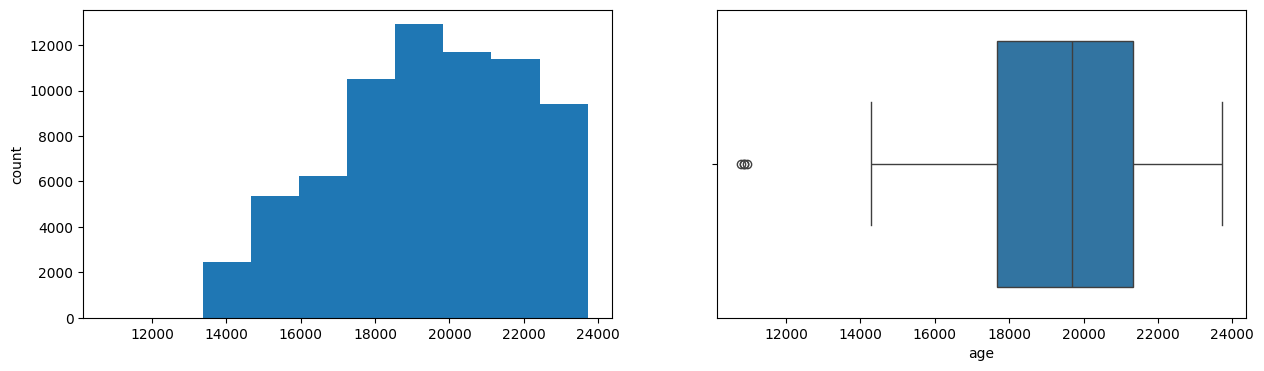

gender
Skew : 0.63


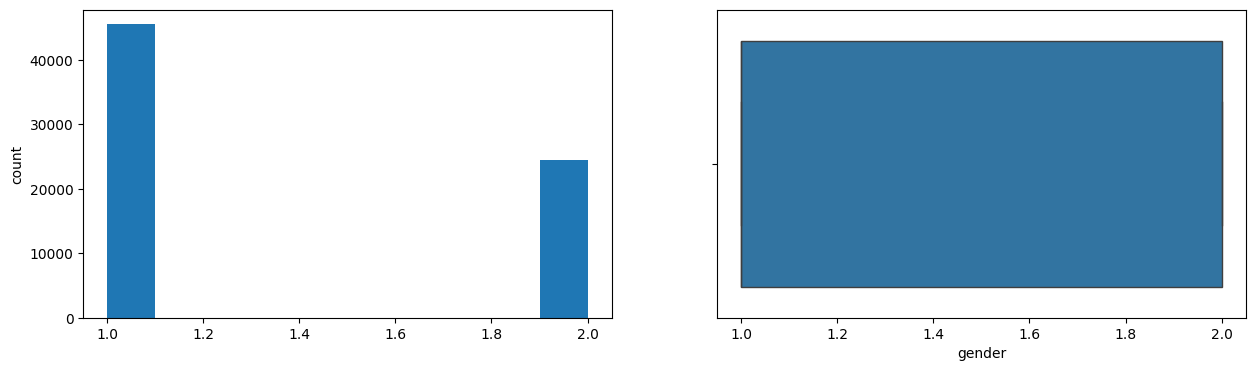

height
Skew : -0.64


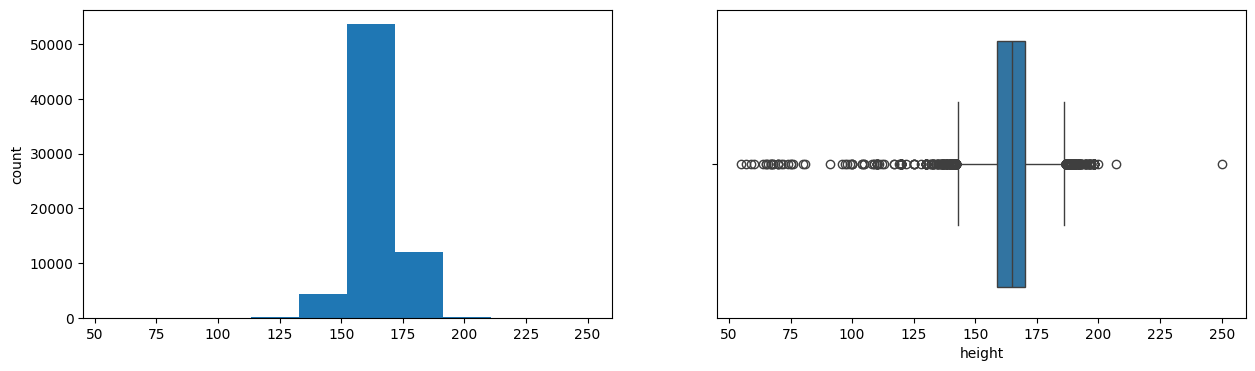

weight
Skew : 1.01


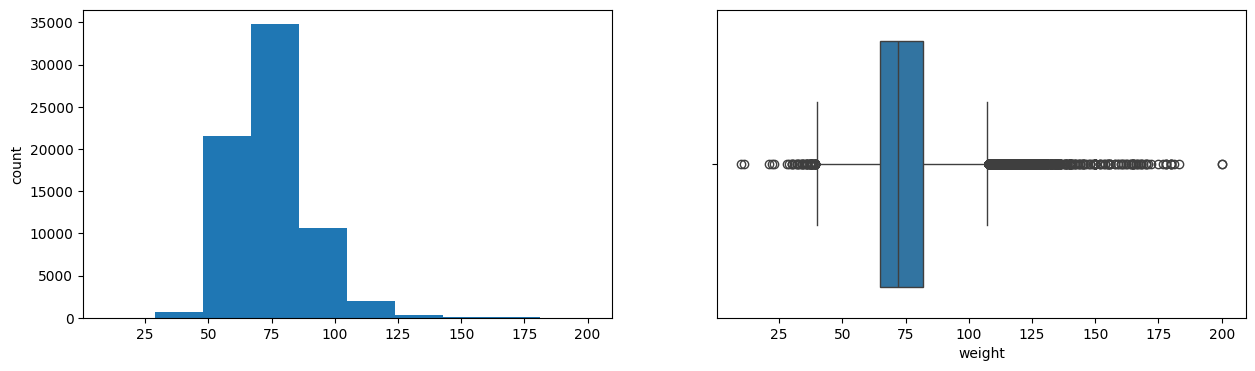

ap_hi
Skew : 85.3


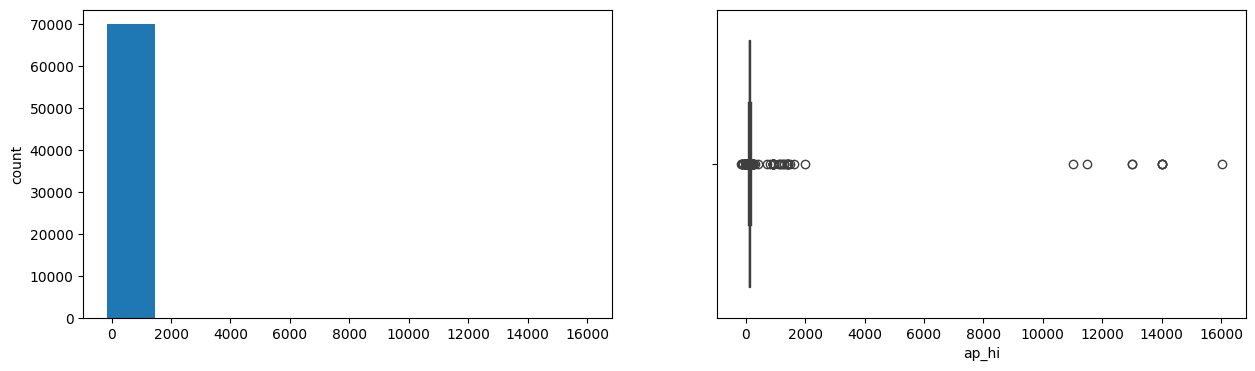

ap_lo
Skew : 32.11


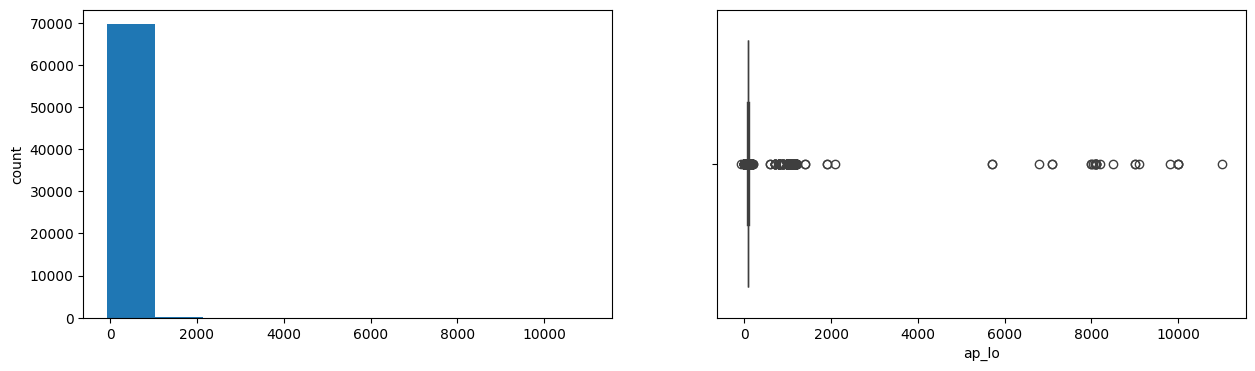

cholesterol
Skew : 1.59


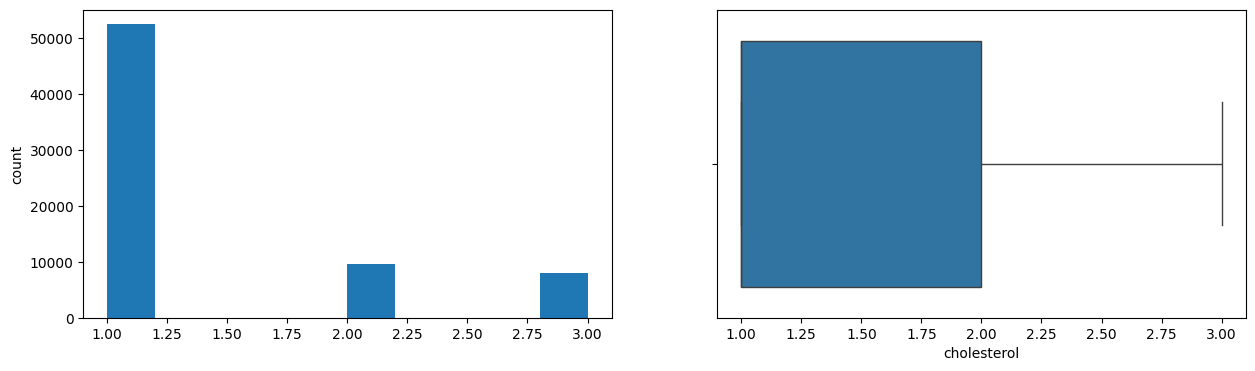

gluc
Skew : 2.4


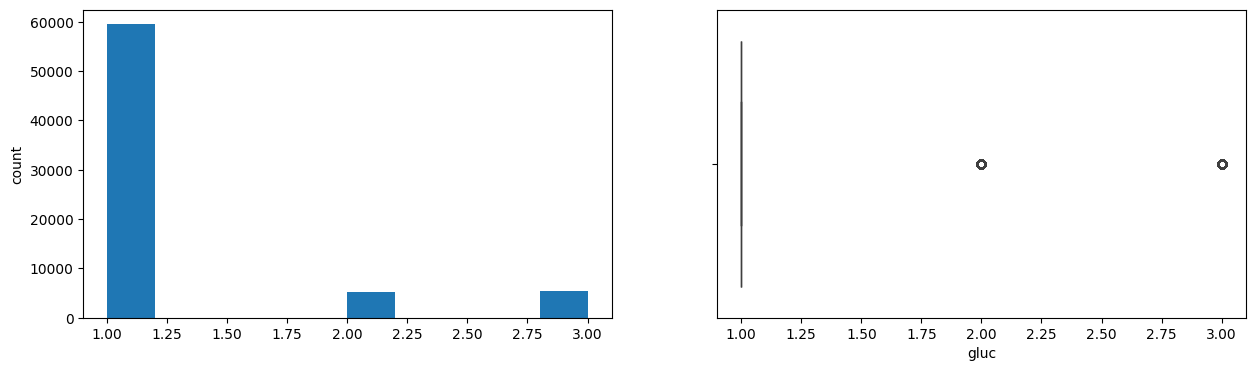

smoke
Skew : 2.91


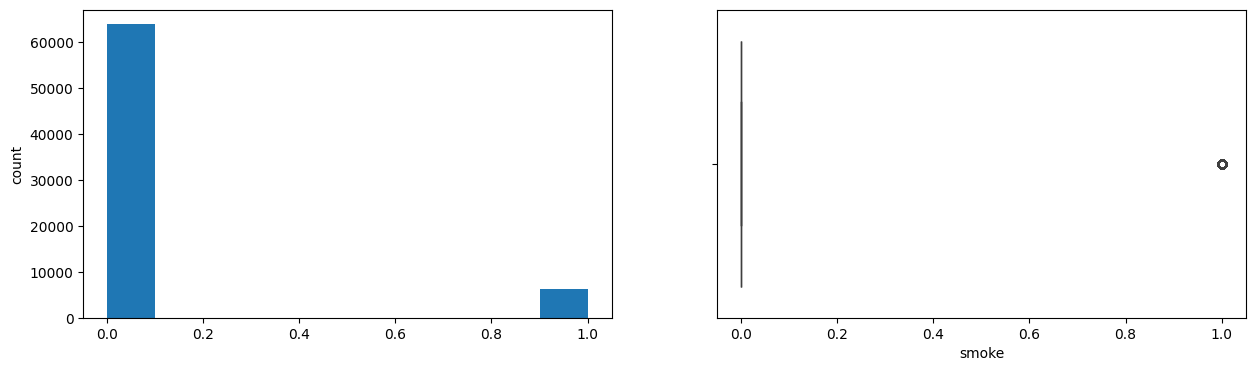

alco
Skew : 3.96


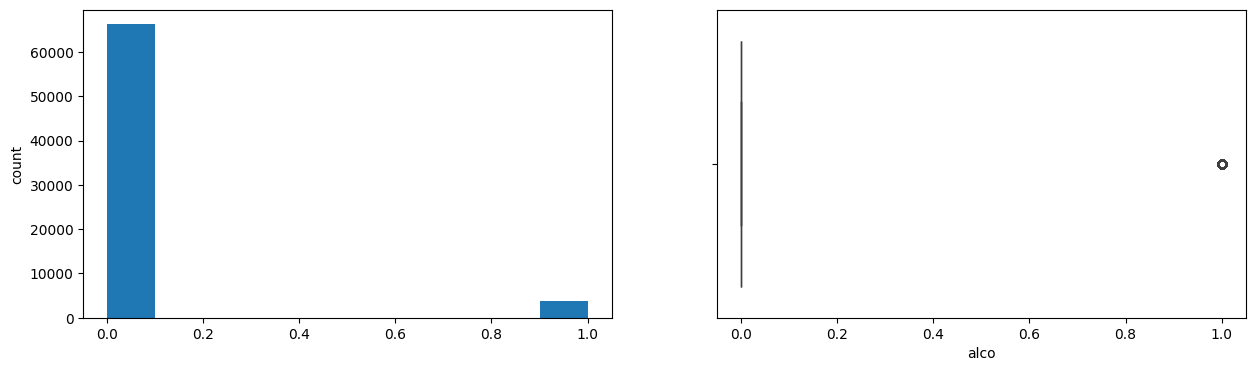

active
Skew : -1.53


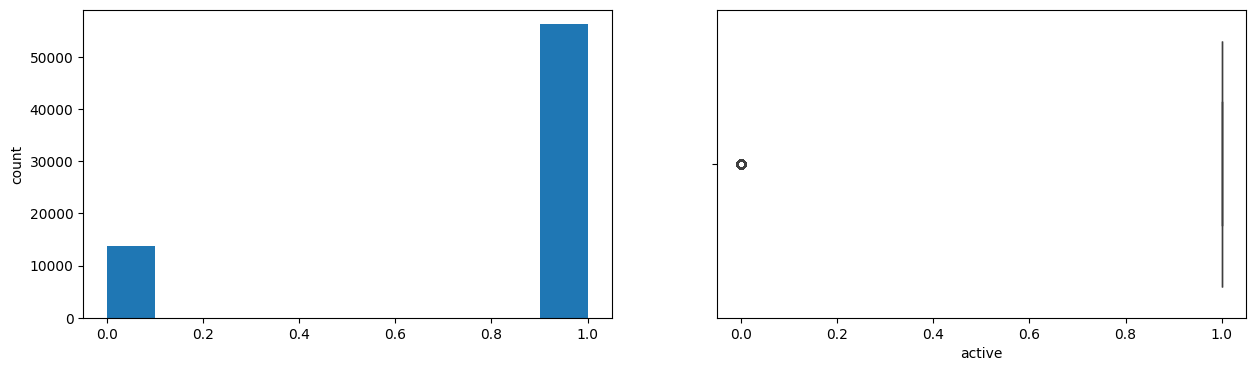

cardio
Skew : 0.0


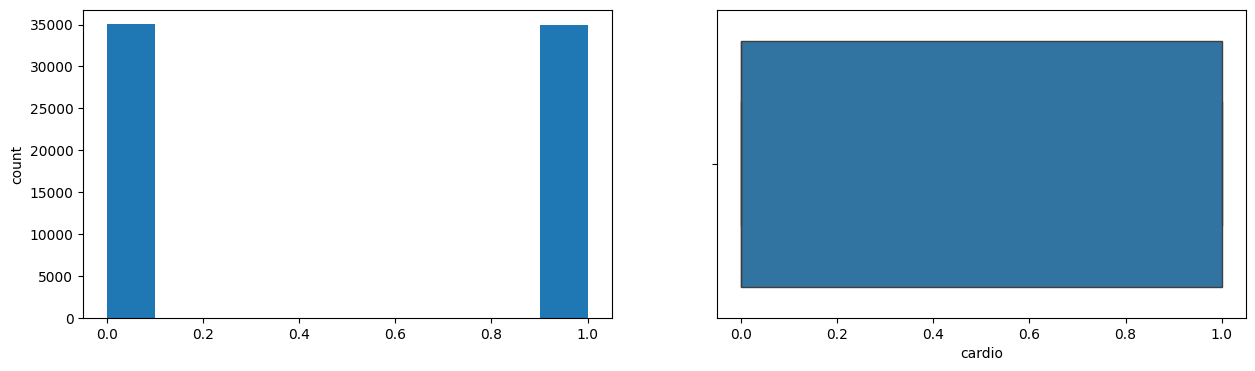

In [149]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Model training section

In [150]:
x = df.drop(columns=['cardio'])
y = df['cardio']

In [151]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [152]:
# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7129285714285715
Precision: 0.7183078045222465
Recall: 0.7022247575584712
F1 Score: 0.7101752361722073


Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.6284285714285714
Precision: 0.6272497187851519
Recall: 0.6361950941243583
F1 Score: 0.6316907391673747


In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.6499285714285714
Precision: 0.65487894350697
Recall: 0.6364803194523674
F1 Score: 0.6455485644029797


Logistic Regression

In [159]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['cardio'])
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2, random_state=42, stratify=y)
print("Training set class counts:")
print(y_train.value_counts())

print("\nTest set class counts:")
print(y_test.value_counts())

Training set class counts:
cardio
0    28017
1    27983
Name: count, dtype: int64

Test set class counts:
cardio
0    7004
1    6996
Name: count, dtype: int64


In [160]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lr_model.fit(X_train, y_train)
lr_model = LogisticRegression()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Adaboost

In [161]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.7222857142857143
Precision: 0.7638370118845501
Recall: 0.6430817610062893
F1 Score: 0.6982772000620828


Naive Bais

In [163]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.5890714285714286
Precision: 0.713500515286843
Recall: 0.2968839336763865
F1 Score: 0.419299485212476


SVM

In [165]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [166]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.6462142857142857
Precision: 0.6574687837212887
Recall: 0.6096340766152087
F1 Score: 0.6326485203589706


XGBoost

In [167]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [168]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.7318571428571429
Precision: 0.7505409582689335
Recall: 0.6941109205260149
F1 Score: 0.7212238229615328


ANN

In [169]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5021 - loss: 122.7257 - val_accuracy: 0.4999 - val_loss: 0.9986
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5019 - loss: 3.4574 - val_accuracy: 0.4997 - val_loss: 1.2968
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5232 - loss: 1.4452 - val_accuracy: 0.5968 - val_loss: 0.6884
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5235 - loss: 0.7852 - val_accuracy: 0.5816 - val_loss: 0.6849
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5446 - loss: 0.7221 - val_accuracy: 0.5969 - val_loss: 0.6755
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5502 - loss: 0.6940 - val_accuracy: 0.5128 - val_loss: 0.6839
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5620 - loss: 0.6967 - val_accuracy: 0.5193 - val_loss: 0.6816
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5653 - loss: 0.7070 - val_acc

LSTM

In [170]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.4996 - loss: 5.4073 - val_accuracy: 0.5002 - val_loss: 0.6943
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.5008 - loss: 0.6990 - val_accuracy: 0.4997 - val_loss: 0.6940
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4961 - loss: 0.6968 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.5015 - loss: 0.6960 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4977 - loss: 0.6938 - val_accuracy: 0.5003 - val_loss: 0.6947
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.5002 - loss: 0.6970 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.4988 - loss: 0.69

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RNN

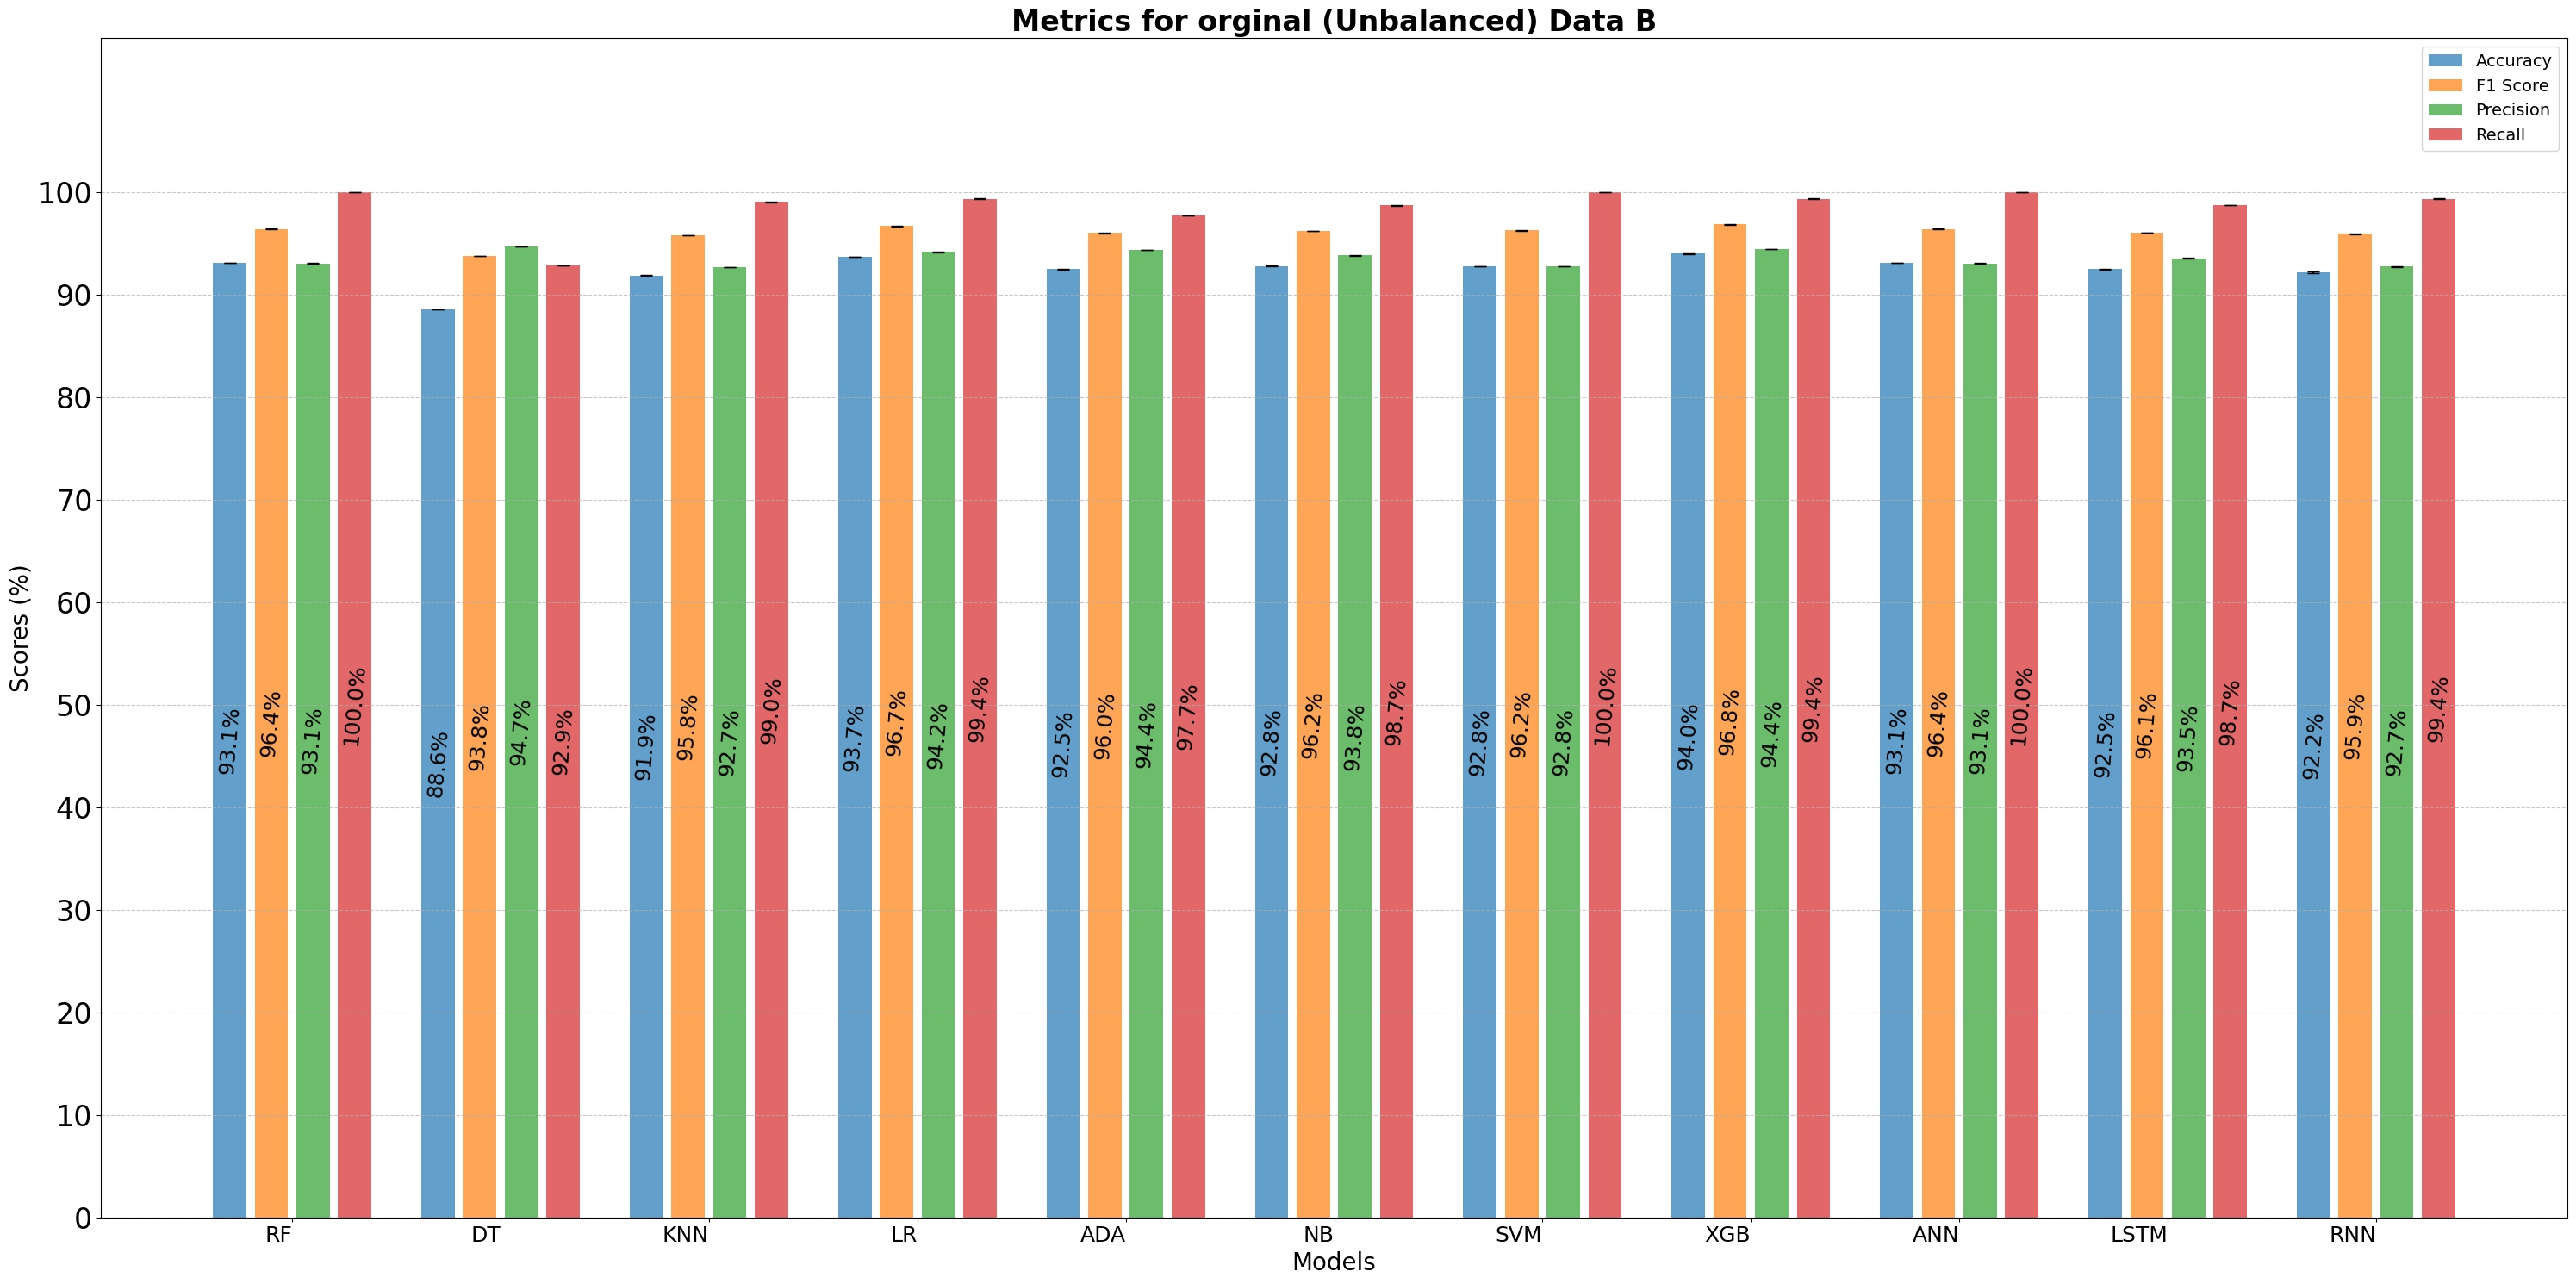

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807, 0.9367469879518072, 0.9246987951807228,
    0.927710843373494, 0.927710843373494, 0.9397590361445783, 0.9307228915662651, 0.9246987951807228,
    0.9216867469879518
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228, 0.9415384615384615, 0.9435736677115988,
    0.9382716049382716, 0.927710843373494, 0.9444444444444444, 0.9305135951661632, 0.9353846153846154,
    0.9272727272727272
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403, 0.9935064935064936, 0.9772727272727273,
    0.987012987012987, 1.0, 0.9935064935064936, 1.0, 0.987012987012987, 0.9935064935064936
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672, 0.966824644549763, 0.960127591706539,
    0.9620253164556962, 0.9625, 0.9683544303797469, 0.9640062597809077, 0.9605055292259084,
    0.9592476489028213
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


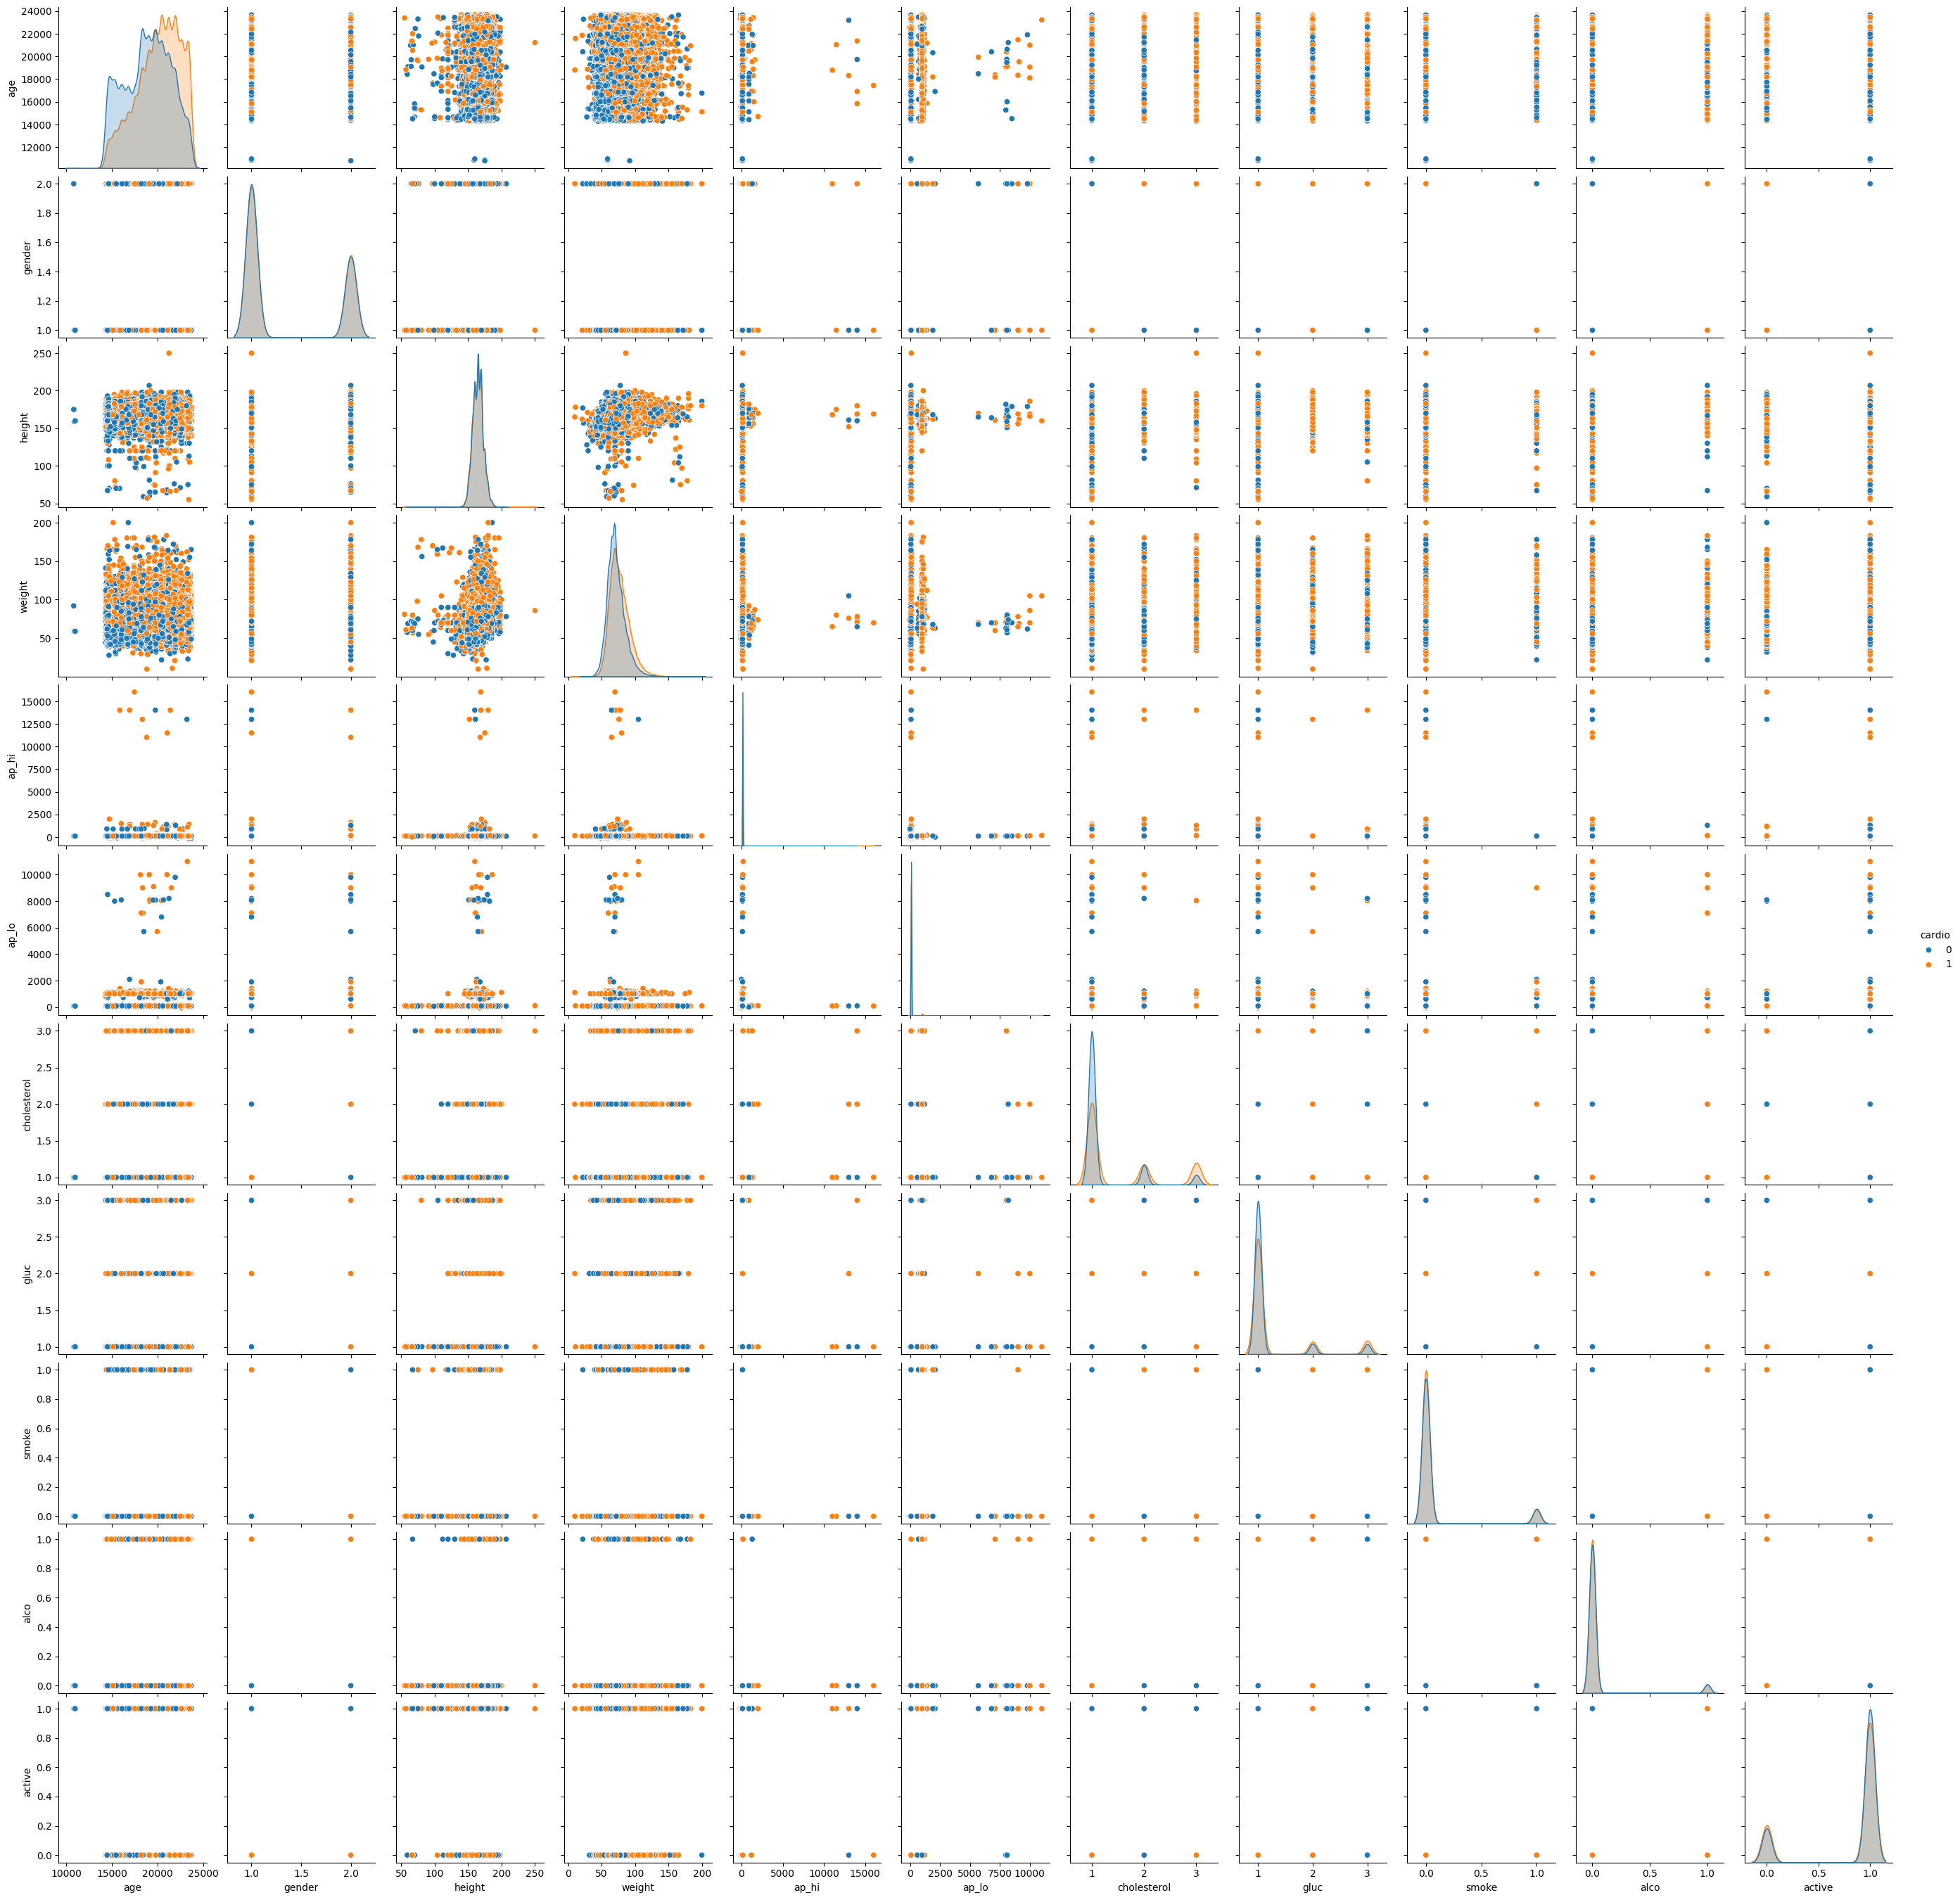

In [172]:
df.info()
sns.pairplot(df, hue = 'cardio')

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr = df.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(21, 21), dpi=700)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.9,
                  cbar_kws={"shrink":0.6,  "pad":0.000001})

# Get the colorbar from the axes
cbar = fig.collections[0].colorbar

cbar.ax.set_position([0.95, 0.1, 0.03, 0.8])
cust_labels = df.columns.tolist()
cust_labels[0] = ''
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0)
cust_labels = df.columns.tolist()
cust_labels[len(cust_labels)-1]= ''
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of Dataset A", fontsize=14)
plt.savefig("Correlation for Features Of Dataset A.pdf", bbox_inches='tight') # save figure
plt.show()

Gain Ratio

In [177]:
X_res = df.drop(columns=['cardio'])
y_res = df['cardio']

In [178]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

        Feature  Gain Ratio
4         ap_hi    0.059219
5         ap_lo    0.047486
6   cholesterol    0.034366
0           age    0.011166
7          gluc    0.008007
3        weight    0.005059
10       active    0.001284
8         smoke    0.000402
2        height    0.000335
9          alco    0.000128
1        gender    0.000051


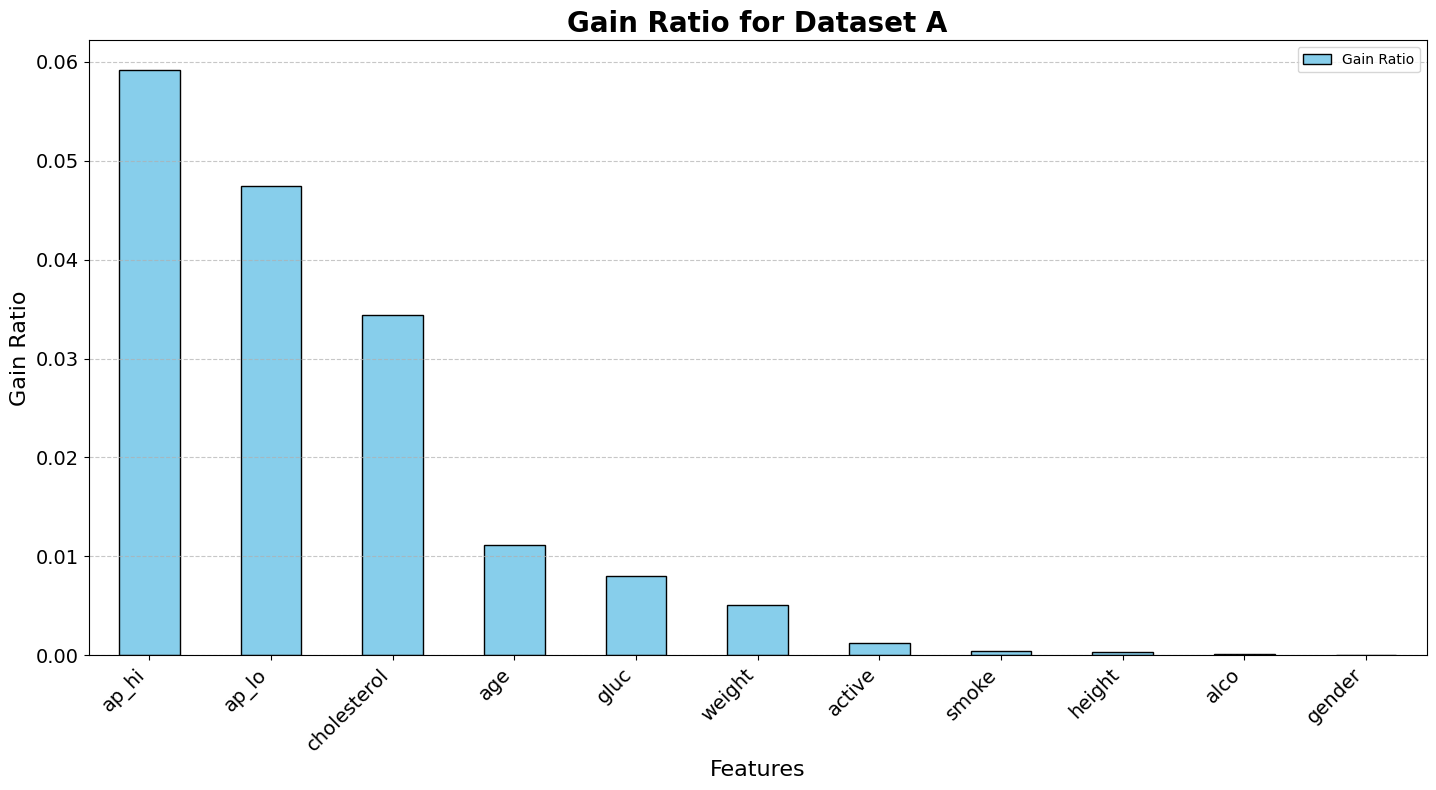

In [179]:
# Plotting the gain ratios
plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for Dataset A', fontsize=20, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=16)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for Dataset A.pdf") # save figure
plt.show()


Information Gain

In [180]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)


        Feature  Information Gain
4         ap_hi          0.172177
0           age          0.141048
5         ap_lo          0.108562
6   cholesterol          0.036573
3        weight          0.029051
7          gluc          0.006092
2        height          0.001653
10       active          0.000918
8         smoke          0.000173
1        gender          0.000047
9          alco          0.000039


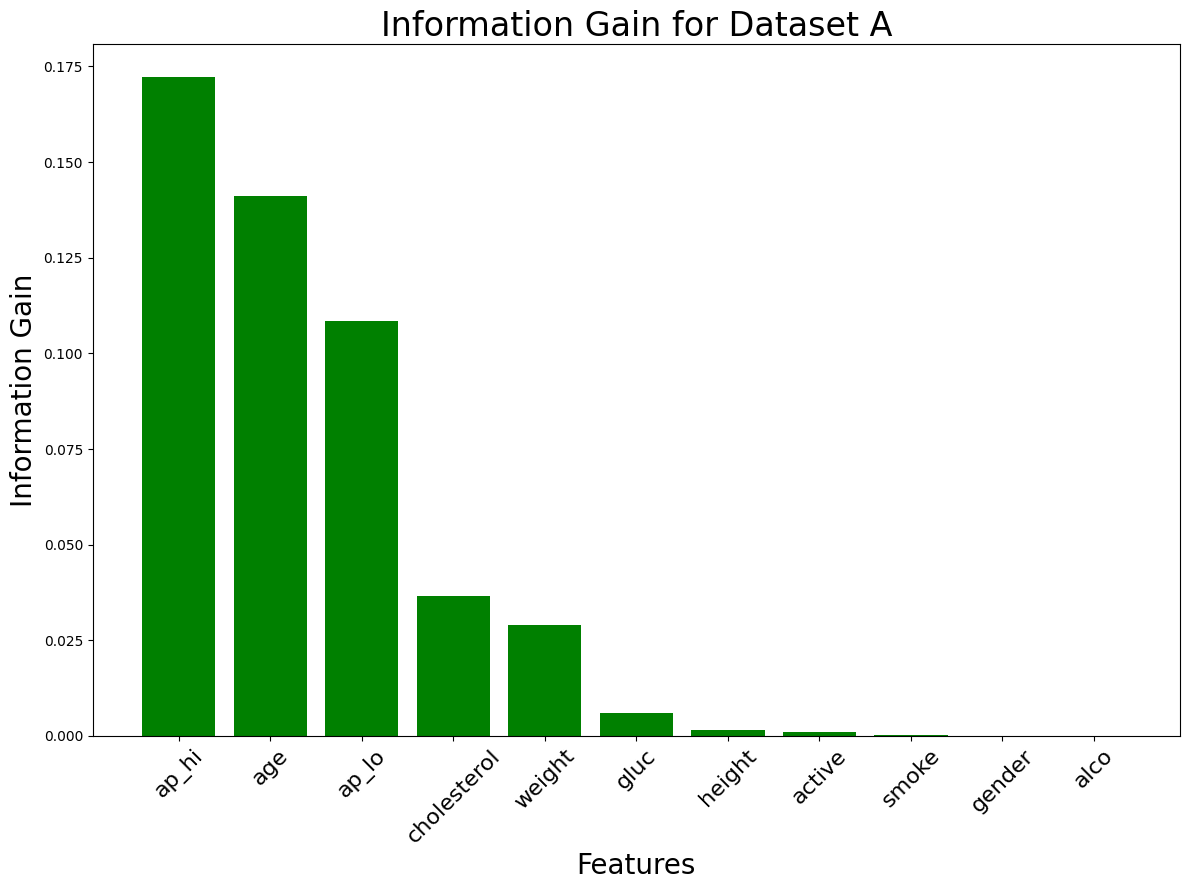

In [181]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(12, 9))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Information Gain', fontsize=20)
plt.title('Information Gain for Dataset A', fontsize=24)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for Dataset A.pdf", bbox_inches='tight')

# Display the plot
plt.show()